## 1. Importar Librerias

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper import Helper
import seaborn as sns
import openpyxl

## 2. Conexión LZ

In [32]:
h=Helper(dsn="IMPALA_PROD")

2024-10-14 14:55:09 - [WARNING] - No se encontro la carpeta "C:\Users\crsalced\Documents\cds\Labur\20. Qflow\1. Analisis Qflow\logs" para guardar los logs


 ___ __  __ ____   _    _        _    
|_ _|  \/  |  _ \ / \  | |      / \   
 | || |\/| | |_) / _ \ | |     / _ \  
 | || |  | |  __/ ___ \| |___ / ___ \ 
|___|_|  |_|_| /_/   \_\_____/_/   \_\
                                      
 _   _ _____ _     ____  _____ ____  
| | | | ____| |   |  _ \| ____|  _ \ 
| |_| |  _| | |   | |_) |  _| | |_) |
|  _  | |___| |___|  __/| |___|  _ < 
|_| |_|_____|_____|_|   |_____|_| \_\
                                     



In [81]:
consulta= """
                SELECT *
                FROM proceso_canales.crsalced_union_bases
          """ 
df_o = h.obtener_dataframe(consulta)

2024-10-14 16:44:54 - [INFO] - Transcurrido: 1360, Tiempo de Refresco = 1000


------------------------------------------------------------
  i    tipo    nombre    estado     hora_inicio   duracion   
------------------------------------------------------------
 3/3 DATAFRAME       convirtiendo   04:44:54 PM             

2024-10-14 16:53:49 - [INFO] - 2,360,614 filas, 10 columnas, 00:02.7 consultando, 08:45.0 descargando, 00:06.7 convirtiendo


 3/3 DATAFRAME         finalizado   04:44:54 PM     08:55.1 
------------------------------------------------------------


## 3. Visualización de los Datos

In [34]:
df_o.head(10)

,fecha_transaccion,cod_canal,tipo_doc,num_doc,naturaleza,monto,tipo_persona,ingresos_mensuales,tipo,cod_jurisdiccion
0,2024-07-06 05:00:00,1000331.0,CEDULA DE CIUDADANIA,-9223285194817728665,ENTRADA,1500000.0,PERSONA NATURAL,1742864.0,SUCURSAL,5001.0
1,2024-07-06 05:00:00,1000331.0,CEDULA DE CIUDADANIA,-9223285194817728665,ENTRADA,2500000.0,PERSONA NATURAL,1742864.0,SUCURSAL,5001.0
2,2024-07-23 05:00:00,2069703.0,CEDULA DE CIUDADANIA,-9223285194817728665,ENTRADA,550000.0,PERSONA NATURAL,1742864.0,CORRESPONSAL,54405.0
3,2024-09-20 05:00:00,2023594.0,CEDULA DE CIUDADANIA,-9223285194817728665,ENTRADA,2000000.0,PERSONA NATURAL,1742864.0,CORRESPONSAL,76001.0
4,2024-09-03 05:00:00,2028672.0,CEDULA DE CIUDADANIA,-9223285194817728665,ENTRADA,3000000.0,PERSONA NATURAL,1742864.0,CORRESPONSAL,76001.0
5,2024-09-03 05:00:00,2028672.0,CEDULA DE CIUDADANIA,-9223285194817728665,ENTRADA,3000000.0,PERSONA NATURAL,1742864.0,CORRESPONSAL,76001.0
6,2024-09-03 05:00:00,2028672.0,CEDULA DE CIUDADANIA,-9223285194817728665,ENTRADA,1150000.0,PERSONA NATURAL,1742864.0,CORRESPONSAL,76001.0
7,2024-09-03 05:00:00,2028672.0,CEDULA DE CIUDADANIA,-9223285194817728665,ENTRADA,3000000.0,PERSONA NATURAL,1742864.0,CORRESPONSAL,76001.0
8,2024-08-22 05:00:00,2045156.0,CEDULA DE CIUDADANIA,-9223285194817728665,ENTRADA,550000.0,PERSONA NATURAL,1742864.0,CORRESPONSAL,5129.0
9,2024-08-05 05:00:00,2035511.0,CEDULA DE CIUDADANIA,-9223285194817728665,ENTRADA,1000000.0,PERSONA NATURAL,1742864.0,CORRESPONSAL,76001.0


## 3.1 Información General del df

In [63]:
print(df_o.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360614 entries, 0 to 2360613
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   fecha_transaccion   datetime64[ns]
 1   cod_canal           float64       
 2   tipo_doc            object        
 3   num_doc             int64         
 4   naturaleza          object        
 5   monto               float64       
 6   tipo_persona        object        
 7   ingresos_mensuales  float64       
 8   tipo                object        
 9   cod_jurisdiccion    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 180.1+ MB
None


## 3.2 Estadisticas Descritivas de las columnas numéricas del df

In [65]:
var_num = ['monto', 'ingresos_mensuales']
estadisticas = df_o[var_num].describe()
print(estadisticas)

              monto  ingresos_mensuales
count  2.360614e+06        2.360614e+06
mean   5.055434e+06        5.098350e+06
std    1.633154e+08        2.858037e+06
min    1.000000e+00        1.850000e+03
25%    1.000000e+05        2.711440e+06
50%    3.000000e+05        5.202590e+06
75%    1.000000e+06        7.540946e+06
max    4.775500e+10        9.995531e+06


In [66]:
columnas_categoricas = ['tipo_doc', 'tipo_persona', 'naturaleza', 'tipo']
estadisticas_categoricas = df_o[columnas_categoricas].describe(include='object')
print(estadisticas_categoricas)

                    tipo_doc     tipo_persona naturaleza          tipo
count                2360614          2360614    2360614       2360594
unique                     9                4          2             3
top     CEDULA DE CIUDADANIA  PERSONA NATURAL    ENTRADA  CORRESPONSAL
freq                 1949187          1985689    1224183       1197815


## 4 Gráficas de las variables

Text(0, 0.5, 'Cantidad')

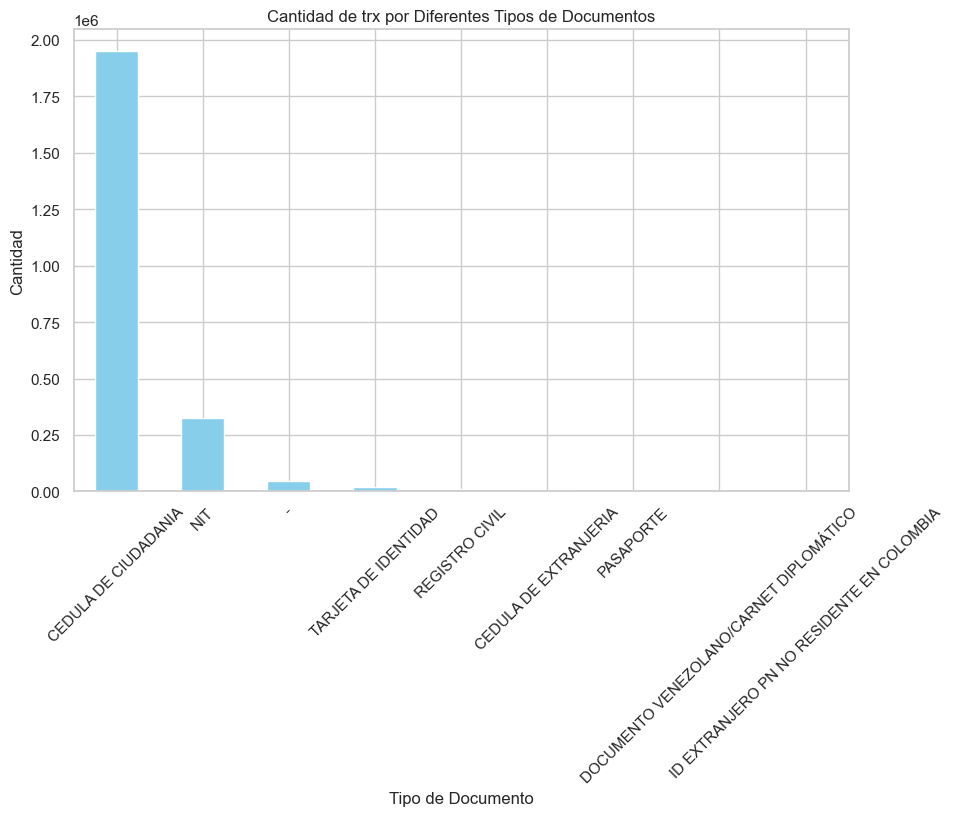

In [78]:
tipo_doc_counts = df_o['tipo_doc'].value_counts()
plt.figure(figsize=(10, 6))
tipo_doc_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de trx por Diferentes Tipos de Documentos')
plt.xlabel('Tipo de Documento')
plt.xticks(rotation=45)
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

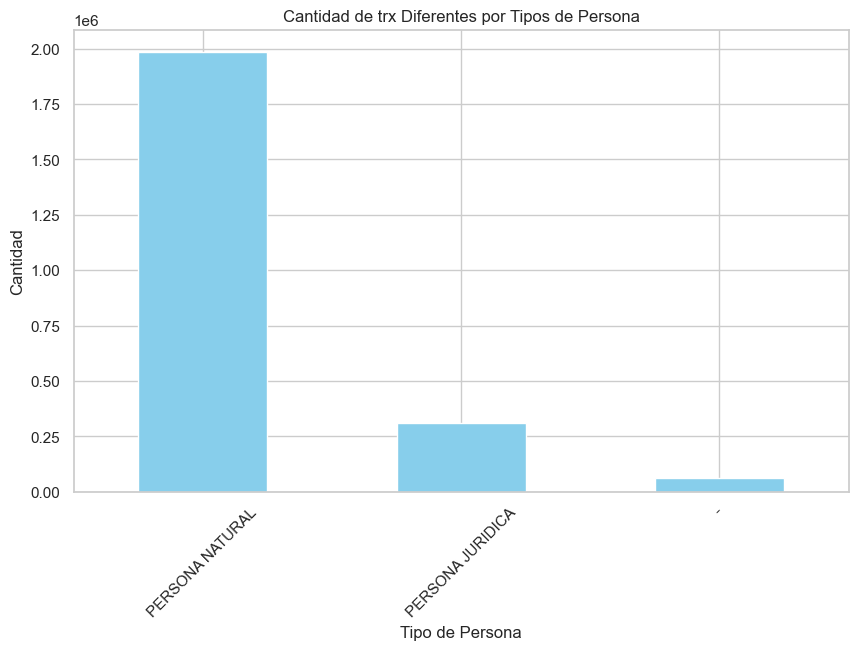

In [83]:
tipo_per_counts = df_o['tipo_persona'].value_counts()
plt.figure(figsize=(10, 6))
tipo_per_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de trx Diferentes por Tipos de Persona')
plt.xlabel('Tipo de Persona')
plt.xticks(rotation=45)
plt.ylabel('Cantidad')

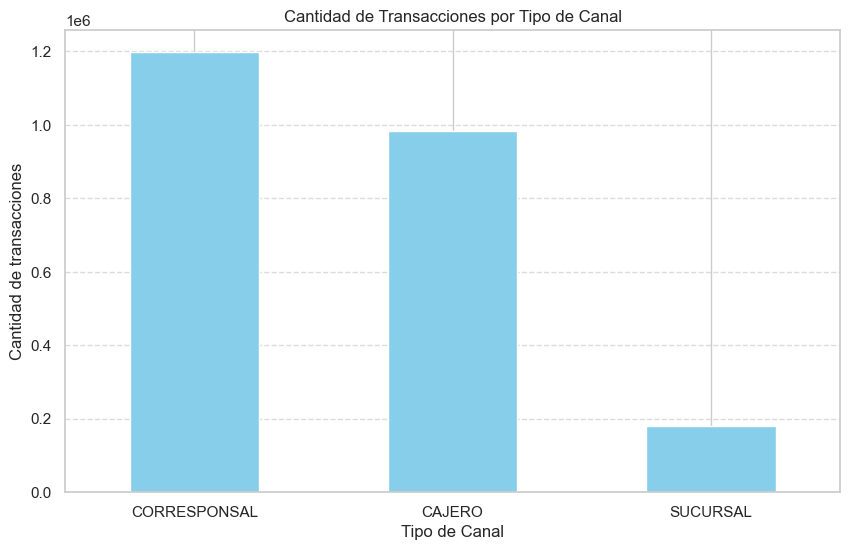

In [57]:
tipo_counts = df_o['tipo'].value_counts()
# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
tipo_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Transacciones por Tipo de Canal')
plt.xlabel('Tipo de Canal')
plt.ylabel('Cantidad de transacciones')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

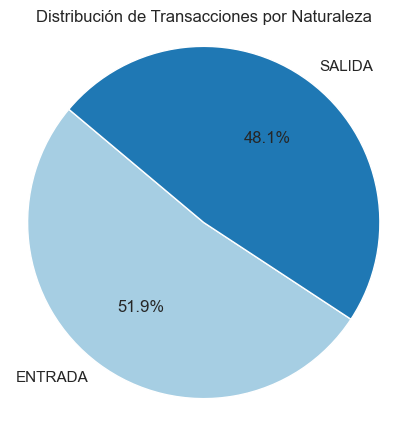

In [74]:
tipo_counts = df_o['naturaleza'].value_counts()
# Crear la gráfica de torta
plt.figure(figsize=(5, 5))
plt.pie(tipo_counts, labels=tipo_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribución de Transacciones por Naturaleza')
plt.axis('equal')
plt.show()

C:\Users\crsalced\AppData\Local\Temp\ipykernel_19612\1916661448.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tipo_persona', y='ingresos_mensuales', data=df_o, palette="Set2")


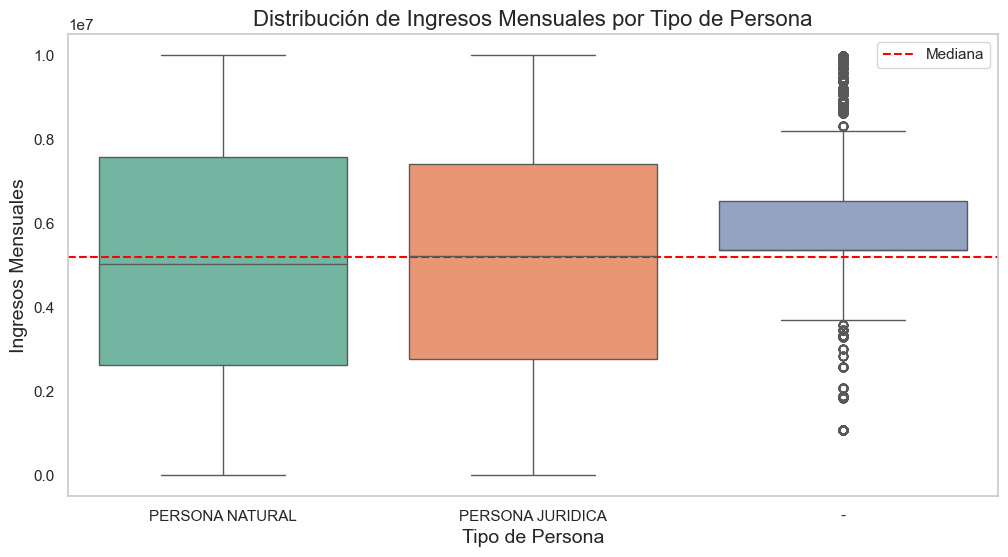

In [84]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='tipo_persona', y='ingresos_mensuales', data=df_o, palette="Set2")
plt.title('Distribución de Ingresos Mensuales por Tipo de Persona', fontsize=16)
plt.xlabel('Tipo de Persona', fontsize=14)
plt.ylabel('Ingresos Mensuales', fontsize=14)
plt.grid(axis='y')
mediana = df_o['ingresos_mensuales'].median()
plt.axhline(mediana, color='red', linestyle='--', label='Mediana', linewidth=1.5)
plt.legend()